In [31]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import numbers
import decimal
data = pd.read_csv('time-series-19-covid-combined.csv')  
print(data.head())
print(data.shape)

         Date Country/Region Province/State   Lat   Long  Confirmed  \
0  2020-01-22       Thailand            NaN  15.0  101.0        2.0   
1  2020-01-23       Thailand            NaN  15.0  101.0        3.0   
2  2020-01-24       Thailand            NaN  15.0  101.0        5.0   
3  2020-01-25       Thailand            NaN  15.0  101.0        7.0   
4  2020-01-26       Thailand            NaN  15.0  101.0        8.0   

   Recovered  Deaths  
0        0.0     0.0  
1        0.0     0.0  
2        0.0     0.0  
3        0.0     0.0  
4        2.0     0.0  
(31062, 8)


In [11]:
# category I Not Nan for 'Province/State' prediction
# category II Country/Region prediction
cat1_idx = data['Province/State'].notnull()
print(set(data['Province/State'][cat1_idx]))

{'Providence County, RI', 'Idaho', 'Suffolk County, NY', 'Maine', 'Placer County, CA', 'Tianjin', 'Arapahoe, CO', 'Washoe County, NV', 'Isle of Man', 'Grand Princess', 'Connecticut', 'Adams, IN', 'Fresno County, CA', 'Middlesex, NJ', 'Douglas County, CO', 'Indiana', 'Harris County, TX', 'Pottawattamie, IA', 'Kane, IL', 'Floyd, GA', 'Dallas, TX', 'King County, WA', 'Montgomery County, PA', 'Jiangxi', 'Tennessee', 'Alaska', 'Cayman Islands', 'New York County, NY', 'Alberta', 'Whatcom, WA', 'Napa, CA', 'Burlington, NJ', 'Kershaw County, SC', 'Clark County, NV', 'Texas', 'Northern Territory', 'Bermuda', 'Pennsylvania', 'Qinghai', 'Heilongjiang', 'United States Virgin Islands', 'Channel Islands', 'Washington County, OR', 'Mayotte', 'New Mexico', 'Davidson County, TN', 'Alachua, FL', 'Minnesota', 'Thurston, WA', 'Davison, SD', 'Fayette, GA', 'Multnomah, OR', 'Kitsap, WA', 'Charlotte County, FL', 'Tibet', 'Lancaster, SC', "Prince George's, MD", 'Beadle, SD', 'Pennington, SD', 'Pinal County, A

In [12]:
def pred_function(series, k=1):
    # Newton-Leibniz baseline -- local prediction by derivative
    # In 1665, following an outbreak of the bubonic plague in England, 
    # Cambridge University closed its doors, forcing Newton to return home and 
    # develop Differential calculus.
    # Leibniz's most prominent accomplishment was conceiving the ideas of differential and integral calculus, 
    # independently of Isaac Newton's contemporaneous developments.
    # Local prediction by derivative
    # Discrete backward derivative delta(x) = f(x) - f(x-1)
    # f(x+1)= delta(x)+f(x)
    
    delta = series[-1] - series[-2]
    pred = k*delta + series[-1]
    return pred

In [14]:
for tmp_location in set(data['Province/State'][cat1_idx]):
    print(tmp_location)
    idx_location = data['Province/State']==tmp_location
    next_confirmed = pred_function(data['Confirmed'][idx_location].to_numpy())
    next_recovered = pred_function(data['Recovered'][idx_location].to_numpy())
    next_deaths = pred_function(data['Deaths'][idx_location].to_numpy())
    
    print(next_confirmed, next_recovered, next_deaths)
    

Providence County, RI
nan nan nan
Idaho
42.0 0.0 0.0
Suffolk County, NY
nan nan nan
Maine
89.0 0.0 0.0
Placer County, CA
nan nan nan
Tianjin
145.0 133.0 3.0
Arapahoe, CO
nan nan nan
Washoe County, NV
nan nan nan
Isle of Man
5.0 0.0 0.0
Grand Princess
13.0 0.0 0.0
Connecticut
223.0 0.0 5.0
Adams, IN
nan nan nan
Fresno County, CA
nan nan nan
Middlesex, NJ
nan nan nan
Douglas County, CO
nan nan nan
Indiana
201.0 0.0 6.0
Harris County, TX
nan nan nan
Pottawattamie, IA
nan nan nan
Kane, IL
nan nan nan
Floyd, GA
nan nan nan
Dallas, TX
nan nan nan
King County, WA
nan nan nan
Montgomery County, PA
nan nan nan
Jiangxi
936.0 934.0 1.0
Tennessee
505.0 0.0 2.0
Alaska
21.0 0.0 0.0
Cayman Islands
3.0 0.0 1.0
New York County, NY
nan nan nan
Alberta
259.0 0.0 1.0
Whatcom, WA
nan nan nan
Napa, CA
nan nan nan
Burlington, NJ
nan nan nan
Kershaw County, SC
nan nan nan
Clark County, NV
nan nan nan
Texas
627.0 0.0 6.0
Northern Territory
3.0 0.0 0.0
Bermuda
2.0 0.0 0.0
Pennsylvania
509.0 0.0 3.0
Qinghai
18.0

In [15]:
cat2_idx = data['Province/State'].isnull()
print(set(data['Country/Region'][cat2_idx]))

{'Slovakia', 'Belarus', 'Portugal', 'Malta', 'Iran', 'Egypt', 'Syria', 'Saint Vincent and the Grenadines', 'Kyrgyzstan', 'Latvia', 'Haiti', 'Costa Rica', 'Bhutan', 'India', 'Brazil', 'San Marino', 'Ireland', 'Dominica', 'Guatemala', 'Monaco', 'Ghana', 'Mauritius', 'Lebanon', 'Iraq', 'Zambia', 'Thailand', 'Dominican Republic', 'Greece', 'Germany', 'Slovenia', 'Cape Verde', 'Cameroon', 'Jamaica', 'Taiwan*', 'Mauritania', 'Trinidad and Tobago', 'Rwanda', 'Jersey', 'Ecuador', 'North Macedonia', 'Guinea', 'Japan', 'Kazakhstan', 'French Guiana', 'Greenland', 'Bolivia', 'Ethiopia', 'Finland', 'Benin', 'The Bahamas', 'Morocco', 'Peru', 'Saudi Arabia', 'South Africa', 'Zimbabwe', 'Niger', 'Venezuela', 'New Zealand', 'Martinique', 'Azerbaijan', 'Uzbekistan', 'Fiji', 'Holy See', 'Sudan', 'Central African Republic', 'Gabon', 'Seychelles', 'Ukraine', 'Moldova', 'Switzerland', 'Vietnam', 'Antigua and Barbuda', 'Liberia', 'Albania', 'Argentina', 'Afghanistan', 'Kuwait', 'Romania', 'Lithuania', 'Tunis

In [16]:
for tmp_location in set(data['Country/Region'][cat2_idx]):
    print(tmp_location)
    idx_location = data['Country/Region']==tmp_location
    next_confirmed = pred_function(data['Confirmed'][idx_location].to_numpy())
    next_recovered = pred_function(data['Recovered'][idx_location].to_numpy())
    next_deaths = pred_function(data['Deaths'][idx_location].to_numpy())
    
    print(next_confirmed, next_recovered, next_deaths)
    

Slovakia
185.0 7.0 1.0
Belarus
76.0 15.0 0.0
Portugal
1600.0 5.0 14.0
Malta
90.0 2.0 0.0
Iran
21638.0 7931.0 1685.0
Egypt
327.0 56.0 14.0
Syria
1.0 0.0 0.0
Saint Vincent and the Grenadines
1.0 0.0 0.0
Kyrgyzstan
14.0 0.0 0.0
Latvia
139.0 1.0 0.0
Haiti
2.0 0.0 0.0
Costa Rica
134.0 2.0 2.0
Bhutan
2.0 0.0 0.0
India
396.0 27.0 7.0
Brazil
1593.0 2.0 25.0
San Marino
160.0 4.0 20.0
Ireland
906.0 5.0 4.0
Dominica
1.0 0.0 0.0
Guatemala
19.0 0.0 1.0
Monaco
23.0 1.0 0.0
Ghana
24.0 0.0 1.0
Mauritius
18.0 0.0 1.0
Lebanon
248.0 8.0 4.0
Iraq
233.0 57.0 20.0
Zambia
3.0 0.0 0.0
Thailand
599.0 44.0 1.0
Dominican Republic
202.0 0.0 3.0
Greece
624.0 19.0 15.0
Germany
24873.0 266.0 94.0
Slovenia
414.0 0.0 2.0
Cape Verde
-1.0 0.0 0.0
Cameroon
40.0 0.0 0.0
Jamaica
16.0 2.0 1.0
Taiwan*
169.0 28.0 2.0
Mauritania
2.0 0.0 0.0
Trinidad and Tobago
50.0 1.0 0.0
Rwanda
19.0 0.0 0.0
Jersey
0.0 0.0 0.0
Ecuador
789.0 3.0 14.0
North Macedonia
114.0 1.0 1.0
Guinea
2.0 0.0 0.0
Japan
1086.0 235.0 40.0
Kazakhstan
60.0 0.0 0

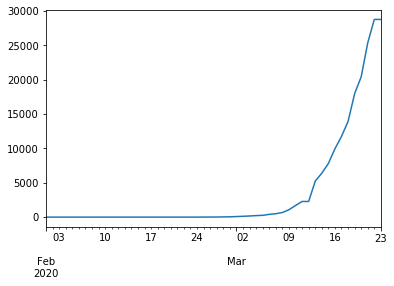

In [17]:
import datetime

offset = 10
tmp_location = "Spain"
idx_location = data['Country/Region']== tmp_location

dates = [datetime.datetime.strptime(x, '%Y-%m-%d') for x in list(data['Date'][idx_location])]
cases = data['Confirmed'][idx_location].values

italy_dynamics = pd.Series(cases[offset:], index = dates[offset:])
italy_dynamics.plot()


real
[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 2.0000e+00 2.0000e+00 2.0000e+00 2.0000e+00 2.0000e+00 2.0000e+00
 2.0000e+00 2.0000e+00 2.0000e+00 2.0000e+00 2.0000e+00 2.0000e+00
 2.0000e+00 2.0000e+00 2.0000e+00 2.0000e+00 6.0000e+00 1.3000e+01
 1.5000e+01 3.2000e+01 4.5000e+01 8.4000e+01 1.2000e+02 1.6500e+02
 2.2200e+02 2.5900e+02 4.0000e+02 5.0000e+02 6.7300e+02 1.0730e+03
 1.6950e+03 2.2770e+03 2.2770e+03 5.2320e+03 6.3910e+03 7.7980e+03
 9.9420e+03 1.1748e+04 1.3910e+04 1.7963e+04 2.0410e+04 2.5374e+04
 2.8768e+04 2.8768e+04]
prediction
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 10.0, 20.0, 17.0, 49.0, 58.0, 123.0, 156.0, 210.0, 279.0, 296.0, 541.0, 600.0, 846.0, 1473.0, 2317.0, 2859.0, 2277

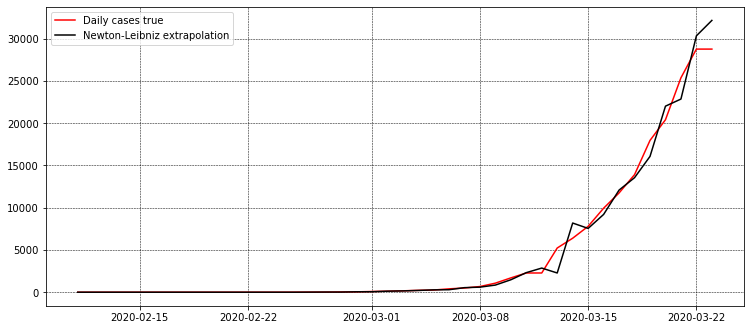

In [18]:
pred = [cases[0], cases[1]]
for i in range(2,len(cases)+1):
    #print(cases[0:i])
    #print("tmp pred")
    #print(pred_function(cases[0:i]))
    pred.append(pred_function(cases[0:i]))

print("real")
print(cases)
print("prediction")
print(pred)

offset = 20
plt.plot(dates[offset:], cases[offset:], 'r')

plt.plot(dates[offset:], pred[offset:-1], 'k')

fig = plt.gcf()
fig.set_size_inches(10.5, 5.5, forward=True)

plt.legend(('Daily cases true', 'Newton-Leibniz extrapolation'))
plt.grid(color='k', linestyle='--', linewidth=0.5)
fig.set_size_inches(12.5, 5.5, forward=True)
plt.show()



In [19]:
def mortality_estimate(data):
    # loop over countires and estimate ratio of predicted deaths and predicted confirmed cases
    
    cat2_idx = data['Province/State'].isnull()
    moratlity_list=[]
    for tmp_location in set(data['Country/Region'][cat2_idx]):
        idx_location = data['Country/Region']==tmp_location
        next_confirmed = pred_function(data['Confirmed'][idx_location].to_numpy())
        next_deaths = pred_function(data['Deaths'][idx_location].to_numpy())
        if next_confirmed > 0:
            next_mortality = next_deaths / next_confirmed 
            moratlity_list.append(next_mortality)
            
    cat1_idx = data['Province/State'].notnull()
    for tmp_location in set(data['Province/State'][cat1_idx]):

        idx_location = data['Province/State']==tmp_location
        next_confirmed = pred_function(data['Confirmed'][idx_location].to_numpy())
        next_recovered = pred_function(data['Recovered'][idx_location].to_numpy())
        next_deaths = pred_function(data['Deaths'][idx_location].to_numpy())
        if next_confirmed > 0:
            next_mortality = next_deaths / next_confirmed 
            moratlity_list.append(next_mortality)
    
    next_mortality_avg = np.average(np.asarray(moratlity_list))
    
    return next_mortality_avg


In [34]:
#export to CSV file .... last day
    
next_mortality_avg = mortality_estimate(data)
print(next_mortality_avg)

from datetime import date
#today = date.today()
last_date_str = data['Date'].to_numpy()[-1]
file_str = "2day_prediction_" + last_date_str + ".csv"
print(file_str)

next_pred_date = datetime.datetime.strptime( last_date_str, "%Y-%m-%d")+datetime.timedelta(days=2)
f = open(file_str,"w+")


f.write("Province/State, Country, prediction target date, N, low95N, high95N, R, low95R, high95R, D, low95D, high95D, T, low95T, high95T, M, low95M, high95M \n")


cat2_idx = data['Province/State'].isnull()
for tmp_location in set(data['Country/Region'][cat2_idx]):
    
    try:
        idx_location = data['Country/Region']==tmp_location
        next_confirmed = pred_function(data['Confirmed'][idx_location].to_numpy())
        if (math.isnan(next_confirmed)==True):
            next_confirmed = 0

        next_recovered = pred_function(data['Recovered'][idx_location].to_numpy())
        if (math.isnan(next_recovered)==True):
            next_recovered = 0

        next_deaths = pred_function(data['Deaths'][idx_location].to_numpy())
        if (math.isnan(next_deaths)==True):
            next_deaths = 0

        loc1 = data['Province/State'][idx_location].iloc[0]
        loc2 = data['Country/Region'][idx_location].iloc[0]

        next_pred_date_str = next_pred_date.strftime("%Y-%m-%d")+","
        loc1_str = str(loc1).replace(',', ' ') + ","
        loc2_str = str(loc2).replace(',', ' ') + ","
        n_str = str(next_confirmed)+",,,"
        r_str = str(next_recovered)+",,,"
        d_str = str(next_deaths) + ",,,"
        t_str = ",,,"
        m_str = str(next_mortality_avg)+",,\n"

        f.write(","+loc2_str+next_pred_date_str+n_str+r_str+d_str+t_str+m_str)
    except:
        print("Unexpected error:", sys.exc_info()[0])

cat1_idx = data['Province/State'].notnull()
for tmp_location in set(data['Province/State'][cat1_idx]):

    try:
        idx_location = data['Province/State']==tmp_location
        next_confirmed = pred_function(data['Confirmed'][idx_location].to_numpy())
        if (math.isnan(next_confirmed)==True):
            next_confirmed = 0
        next_recovered = pred_function(data['Recovered'][idx_location].to_numpy())
        if (math.isnan(next_recovered)==True):
            next_recovered = 0
        next_deaths = pred_function(data['Deaths'][idx_location].to_numpy())
        if (math.isnan(next_deaths)==True):
            next_deaths = 0

        loc1 = data['Province/State'][idx_location].iloc[0]
        loc2 = data['Country/Region'][idx_location].iloc[0]

        next_pred_date_str = next_pred_date.strftime("%Y-%m-%d")+","
        loc1_str = str(loc1).replace(',', ' ') + ","
        loc2_str = str(loc2).replace(',', ' ') + ","
        if (isinstance(next_confirmed, numbers.Number)):
            n_str = str(next_confirmed)+",,,"
        else:
            n_str = ",,,"

        if (isinstance(next_recovered, numbers.Number)):
            r_str = str(next_recovered)+",,,"
        else:
            r_str = ",,,"

        if (isinstance(next_deaths, numbers.Number)):
            d_str = str(next_deaths) + ",,,"
        else:
            d_str = ",,,"

        t_str = ",,,"
        m_str = str(next_mortality_avg)+",,\n"

        f.write(loc1_str+loc2_str+next_pred_date_str+n_str+r_str+d_str+t_str+m_str)
    except:
        print("Unexpected error:", sys.exc_info()[0])
    
print("baseline predictions writtern to:"+file_str)   
f.close()

0.016383185746629867
2day_prediction_2020-03-23.csv
baseline predictions writtern to:2day_prediction_2020-03-23.csv


In [20]:
#historical predictions dates
dt_array_all = data['Date'].to_numpy()[0:62]
print(dt_array_all)


['2020-01-22' '2020-01-23' '2020-01-24' '2020-01-25' '2020-01-26'
 '2020-01-27' '2020-01-28' '2020-01-29' '2020-01-30' '2020-01-31'
 '2020-02-01' '2020-02-02' '2020-02-03' '2020-02-04' '2020-02-05'
 '2020-02-06' '2020-02-07' '2020-02-08' '2020-02-09' '2020-02-10'
 '2020-02-11' '2020-02-12' '2020-02-13' '2020-02-14' '2020-02-15'
 '2020-02-16' '2020-02-17' '2020-02-18' '2020-02-19' '2020-02-20'
 '2020-02-21' '2020-02-22' '2020-02-23' '2020-02-24' '2020-02-25'
 '2020-02-26' '2020-02-27' '2020-02-28' '2020-02-29' '2020-03-01'
 '2020-03-02' '2020-03-03' '2020-03-04' '2020-03-05' '2020-03-06'
 '2020-03-07' '2020-03-08' '2020-03-09' '2020-03-10' '2020-03-11'
 '2020-03-12' '2020-03-13' '2020-03-14' '2020-03-15' '2020-03-16'
 '2020-03-17' '2020-03-18' '2020-03-19' '2020-03-20' '2020-03-21'
 '2020-03-22' '2020-03-23']


In [ ]:
#historical predictions 
import datetime

dt_array_all = data['Date'].to_numpy()[0:62]
print(dt_array_all)
for dt_idx in range(1,len(dt_array_all)):
    
    try:
        k = 2
        pivot_today_str = dt_array_all[dt_idx]
        pivot_today = datetime.datetime.strptime( pivot_today_str, "%Y-%m-%d")
        file_str = str(k)+"day_prediction_" + pivot_today.strftime("%Y-%m-%d") + ".csv"
        print(file_str)

        next_pred_date = pivot_today + datetime.timedelta(days=k)
        f = open(file_str,"w+")

        f.write("Province/State, Country, Target/Date, N, low95N, high95N, R, low95R, high95R,\
        D, low95D, high95D, T, low95T, high95T, M, low95M, high95M \n")

        cat2_idx = data['Province/State'].isnull()
        for tmp_location in set(data['Country/Region'][cat2_idx]):

            idx_location = data['Country/Region']==tmp_location
            #string comparions ... Y M D <= operator works
            idx_time = data['Date'] <= pivot_today_str
            conf_array_all = data['Confirmed'][idx_location & idx_time].to_numpy() 
            rec_array_all = data['Recovered'][idx_location & idx_time].to_numpy()
            dead_array_all = data['Deaths'][idx_location & idx_time].to_numpy()

            next_confirmed = pred_function(conf_array_all,k)
            if (math.isnan(next_confirmed)==True):
                next_confirmed = 0

            next_recovered = pred_function(rec_array_all,k)
            if (math.isnan(next_recovered)==True):
                next_recovered = 0

            next_deaths = pred_function(dead_array_all,k)
            if (math.isnan(next_deaths)==True):
                next_deaths = 0

            if next_confirmed > 0:
                next_mortality = next_deaths / next_confirmed 
                m_str = str(next_mortality)+",,\n"
            else:
                next_mortality = 0
                m_str = ",,\n"

            loc1 = data['Province/State'][idx_location].iloc[0]
            loc2 = data['Country/Region'][idx_location].iloc[0]

            next_pred_date_str = next_pred_date.strftime("%Y-%m-%d")+","
            loc1_str = str(loc1).replace(',', ' ') + ","
            loc2_str = str(loc2).replace(',', ' ') + ","

            if (isinstance(next_confirmed, numbers.Number)):
                n_str = str(next_confirmed)+",,,"
            else:
                n_str = ",,,"


            if (isinstance(next_recovered, numbers.Number)):
                r_str = str(next_recovered)+",,,"
            else:
                r_str = ",,,"


            if (isinstance(next_deaths, numbers.Number)):
                d_str = str(next_deaths) + ",,,"
            else:
                d_str = ",,,"


            t_str = ",,,"

            f.write(","+loc2_str+next_pred_date_str+n_str+r_str+d_str+t_str+m_str)

        cat1_idx = data['Province/State'].notnull()
        for tmp_location in set(data['Province/State'][cat1_idx]):

            idx_location = data['Province/State']==tmp_location
            #string comparions ... Y M D <= operator works
            idx_time = data['Date'] <= pivot_today_str
            conf_array_all = data['Confirmed'][idx_location & idx_time].to_numpy() 
            rec_array_all = data['Recovered'][idx_location & idx_time].to_numpy()
            dead_array_all = data['Deaths'][idx_location & idx_time].to_numpy()

            next_confirmed = pred_function(conf_array_all,k)
            if (math.isnan(next_confirmed)==True):
                next_confirmed = 0

            next_recovered = pred_function(rec_array_all,k)
            if (math.isnan(next_recovered)==True):
                next_recovered = 0

            next_deaths = pred_function(dead_array_all,k)
            if (math.isnan(next_deaths)==True):
                next_deaths = 0   


            if next_confirmed > 0:
                next_mortality = next_deaths / next_confirmed 
                m_str = str(next_mortality)+",,\n"
            else:
                next_mortality = 0
                m_str = ",,\n"

            loc1 = data['Province/State'][idx_location].iloc[0]
            loc2 = data['Country/Region'][idx_location].iloc[0]

            next_pred_date_str = next_pred_date.strftime("%Y-%m-%d")+","
            loc1_str = str(loc1).replace(',', ' ') + ","
            loc2_str = str(loc2).replace(',', ' ') + ","

            if (isinstance(next_confirmed, numbers.Number)):
                n_str = str(next_confirmed)+",,,"
            else:
                n_str = ",,,"


            if (isinstance(next_recovered, numbers.Number)):
                r_str = str(next_recovered)+",,,"
            else:
                r_str = ",,,"


            if (isinstance(next_deaths, numbers.Number)):
                d_str = str(next_deaths) + ",,,"
            else:
                d_str = ",,,"
            t_str = ",,,"

            f.write(loc1_str+loc2_str+next_pred_date_str+n_str+r_str+d_str+t_str+m_str)

        print("baseline predictions writtern to:"+file_str)   
        f.close()
    except:
        print("Unexpected error:", sys.exc_info()[0])

print("***END***")

    

['2020-01-22' '2020-01-23' '2020-01-24' '2020-01-25' '2020-01-26'
 '2020-01-27' '2020-01-28' '2020-01-29' '2020-01-30' '2020-01-31'
 '2020-02-01' '2020-02-02' '2020-02-03' '2020-02-04' '2020-02-05'
 '2020-02-06' '2020-02-07' '2020-02-08' '2020-02-09' '2020-02-10'
 '2020-02-11' '2020-02-12' '2020-02-13' '2020-02-14' '2020-02-15'
 '2020-02-16' '2020-02-17' '2020-02-18' '2020-02-19' '2020-02-20'
 '2020-02-21' '2020-02-22' '2020-02-23' '2020-02-24' '2020-02-25'
 '2020-02-26' '2020-02-27' '2020-02-28' '2020-02-29' '2020-03-01'
 '2020-03-02' '2020-03-03' '2020-03-04' '2020-03-05' '2020-03-06'
 '2020-03-07' '2020-03-08' '2020-03-09' '2020-03-10' '2020-03-11'
 '2020-03-12' '2020-03-13' '2020-03-14' '2020-03-15' '2020-03-16'
 '2020-03-17' '2020-03-18' '2020-03-19' '2020-03-20' '2020-03-21'
 '2020-03-22' '2020-03-23']
2day_prediction_2020-01-23.csv
baseline predictions writtern to:2day_prediction_2020-01-23.csv
2day_prediction_2020-01-24.csv
baseline predictions writtern to:2day_prediction_2020-